In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import numpy as np

data = pd.read_csv(r"C:\Users\samba\Downloads\CarPrice_Assignment.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [2]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
x= ['CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',  'enginetype',
       'cylindernumber', 'fuelsystem']

In [5]:
for i in x:
    print(i,data[i].unique())

CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

In [6]:
data['fueltype'].replace({'gas':0,'diesel':1},inplace = True)

In [7]:
data['aspiration'].replace({'std':0,'turbo':1},inplace = True)

In [8]:
data['carbody'].replace({'convertible':0,'hatchback':1,'sedan':2,'wagon':3,'hardtop':4},inplace = True)

In [9]:
data['doornumber'].replace({'two':0,'four':1},inplace = True)

In [10]:
data['drivewheel'].replace({'rwd':0,'fwd':1,'4wd':2},inplace = True)

In [11]:
data['enginetype'].replace({'dohc':0,'ohcv':1,'ohc':2,'l':3,'rotor':4,'ohcf':5,'dohcv':6},inplace = True)

In [12]:
data['enginelocation'].replace({'front':0,'rear':1},inplace = True)

In [13]:
data['cylindernumber'].replace({'four':0,'six':1,'five':2,'three':3,'twelve':4,'two':5,'eight':6},inplace = True)

In [14]:
data['fuelsystem'].replace({'mpfi':0,'2bbl':1,'mfi':2,'1bbl':3,'spfi':4,'4bbl':5,'idi':6,'spdi':7},inplace = True)

<AxesSubplot:>

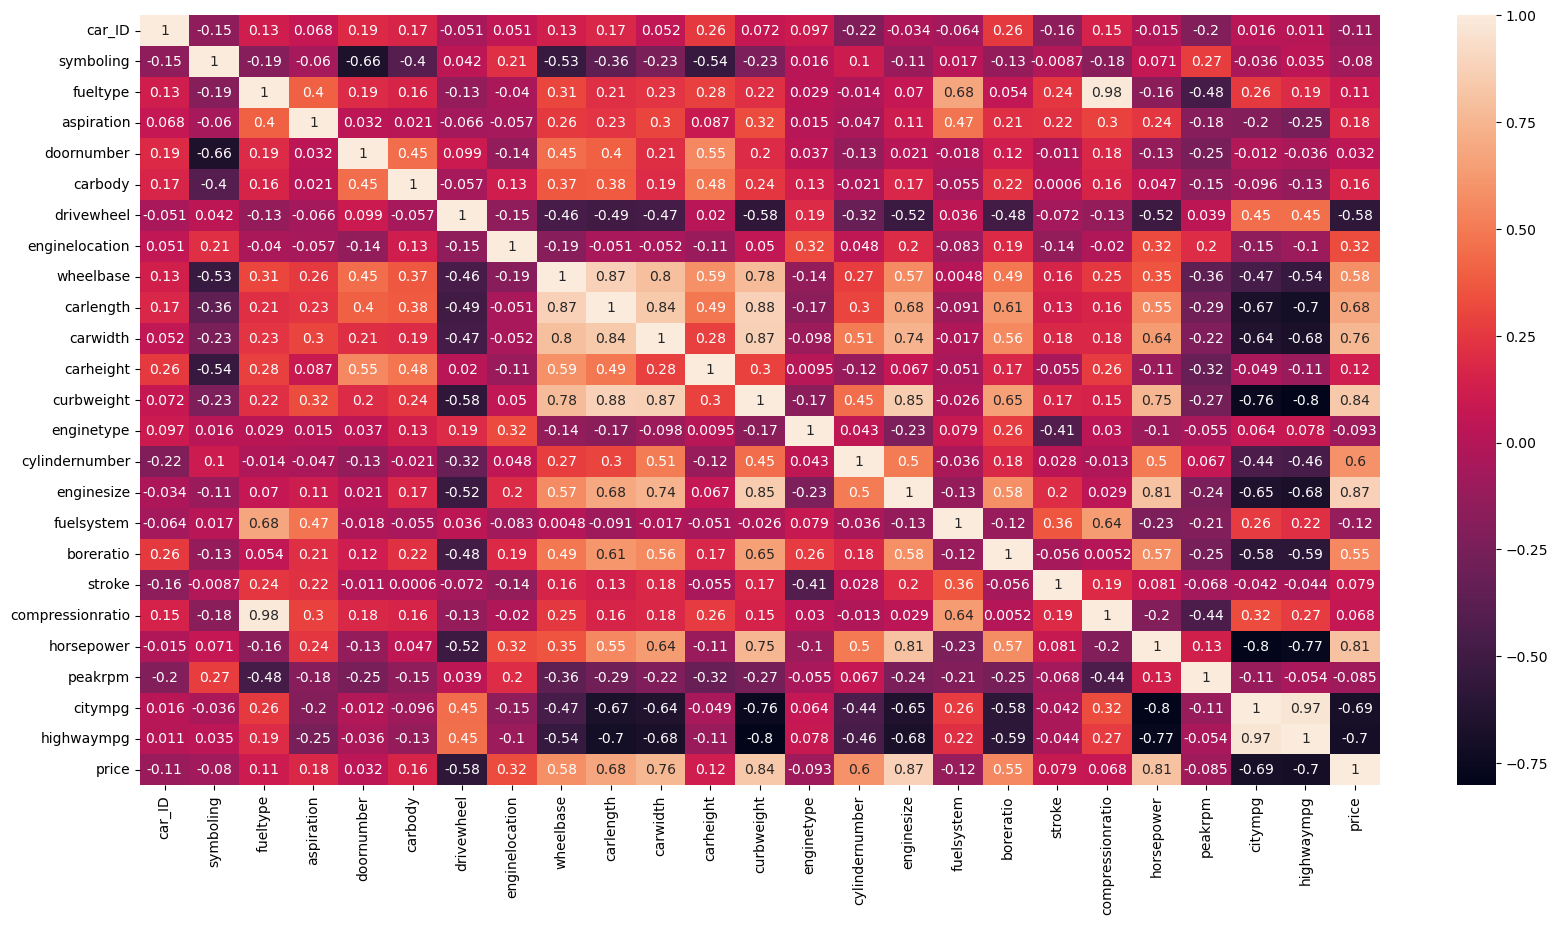

In [15]:
data1 = data.drop(["CarName"],axis = 1)
data1.describe()
cor = data1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(cor,annot = True)

In [16]:
data1 = data1.astype(float)

In [17]:
data1.dtypes

car_ID              float64
symboling           float64
fueltype            float64
aspiration          float64
doornumber          float64
carbody             float64
drivewheel          float64
enginelocation      float64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype          float64
cylindernumber      float64
enginesize          float64
fuelsystem          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [18]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data.iloc[:,3:])
data_scaled=pd.DataFrame(data_scaled,columns=data.iloc[:,3:].columns, index=data.index )
data_final=pd.concat([data.iloc[:,2],data_scaled],axis=1)

In [19]:
x =['car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

C:\Users\samba\AppData\Local\Temp\ipykernel_17548\1040617591.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,20))


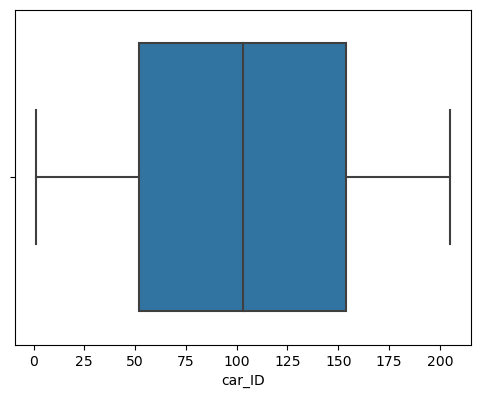

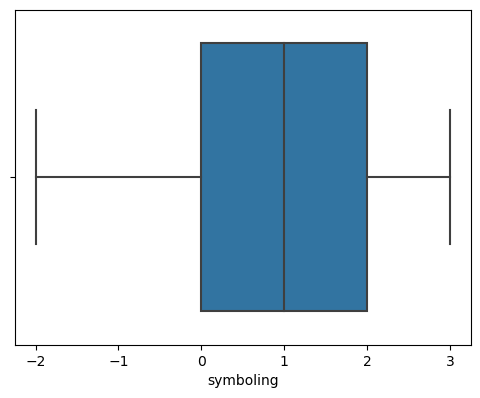

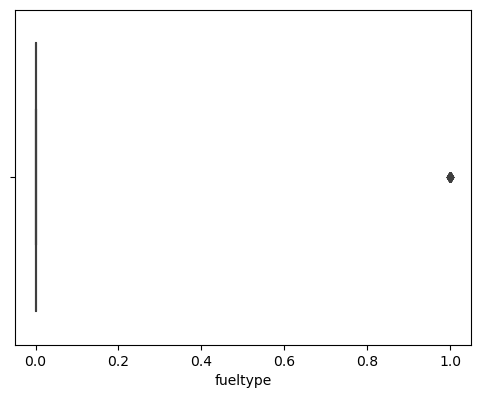

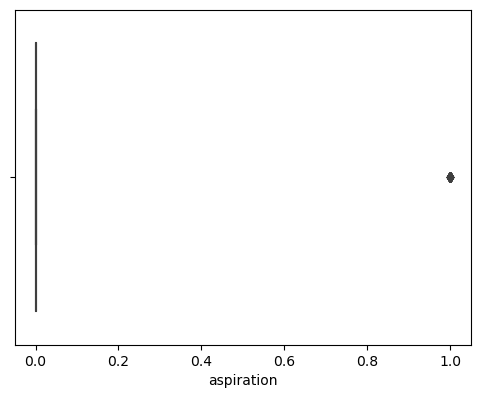

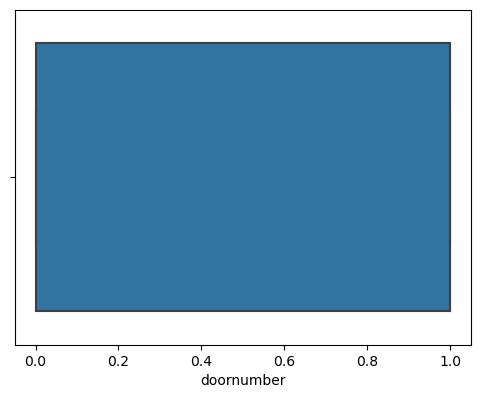

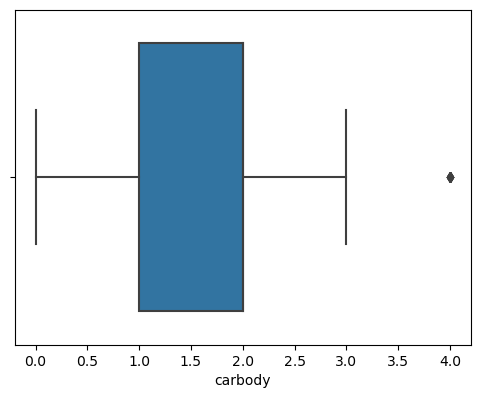

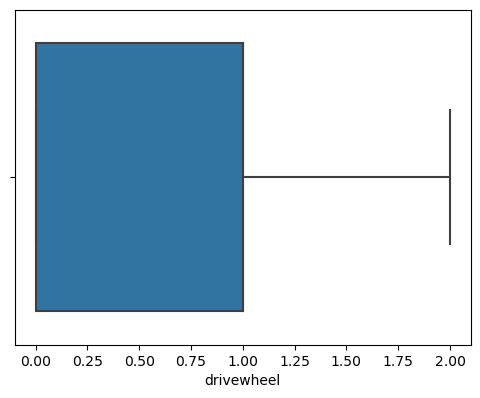

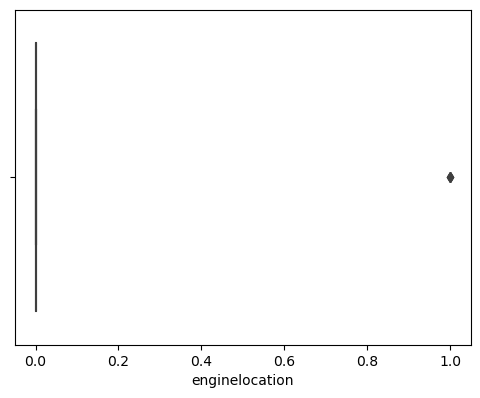

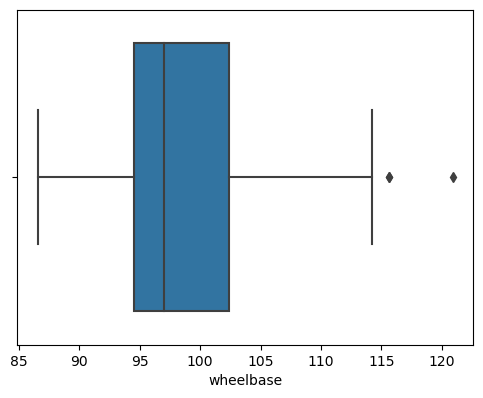

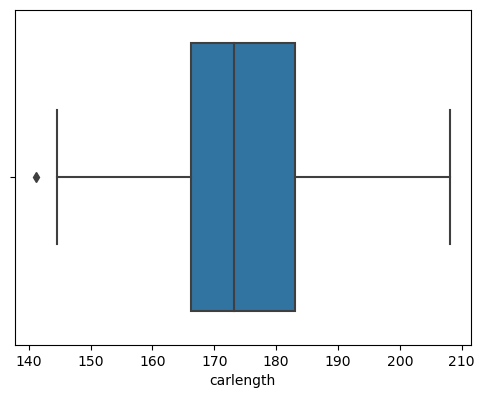

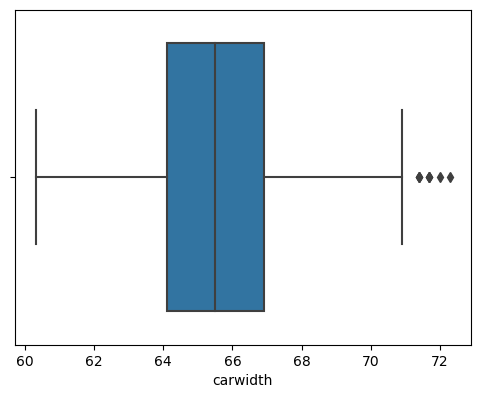

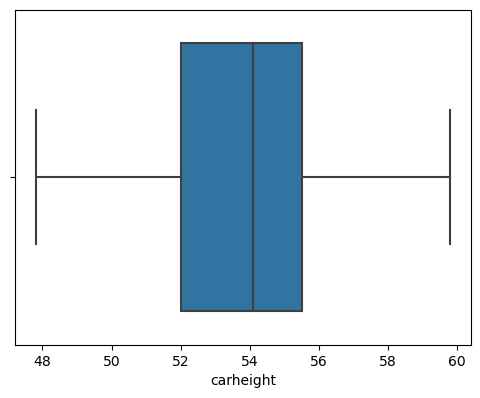

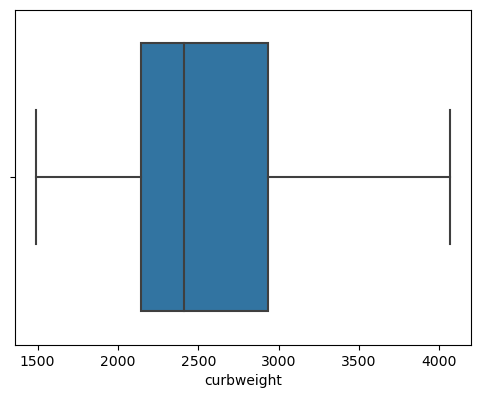

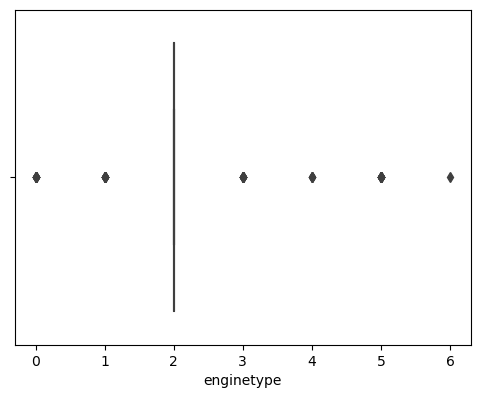

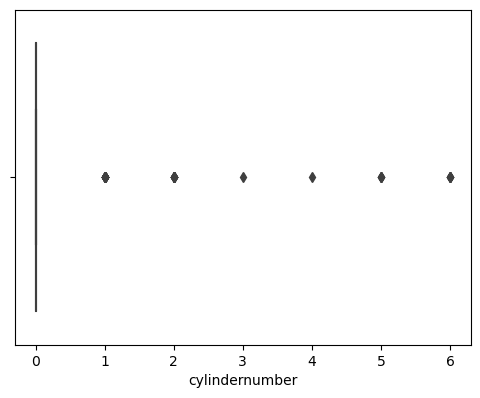

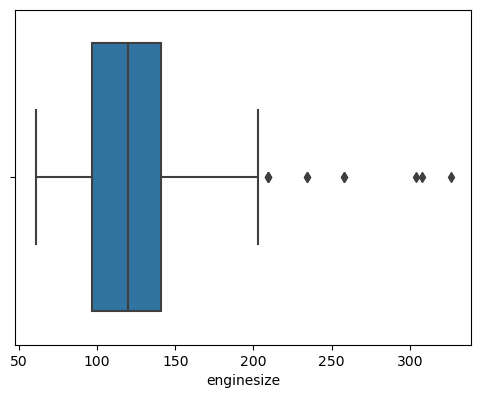

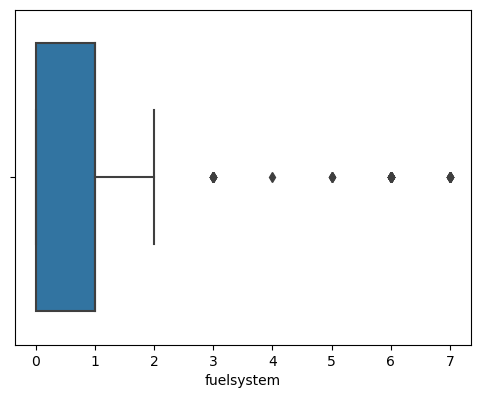

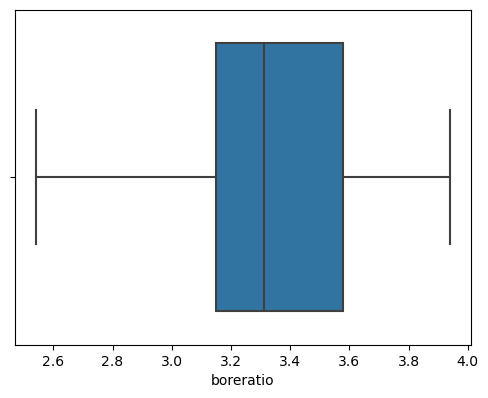

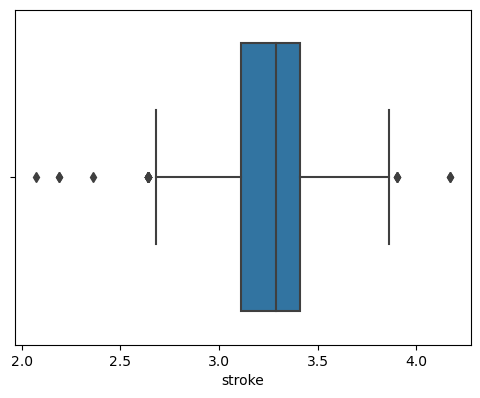

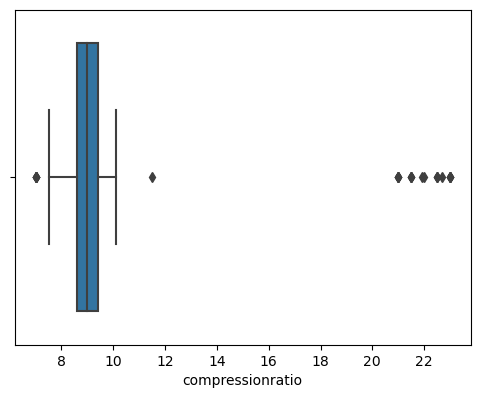

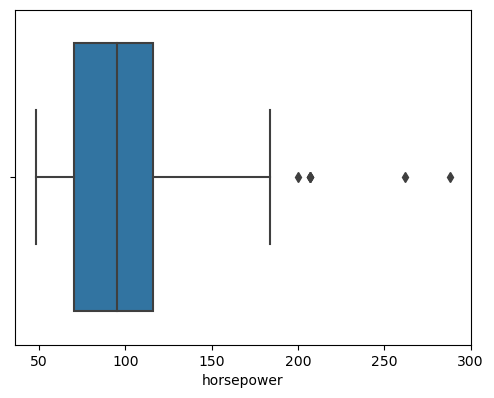

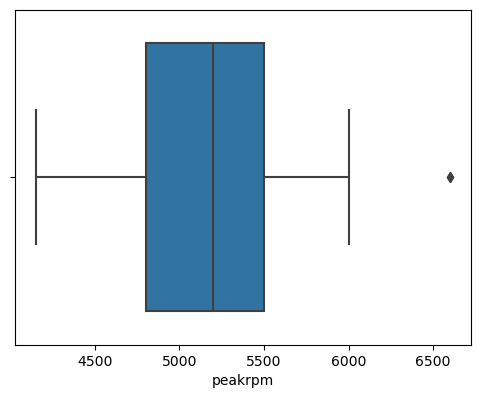

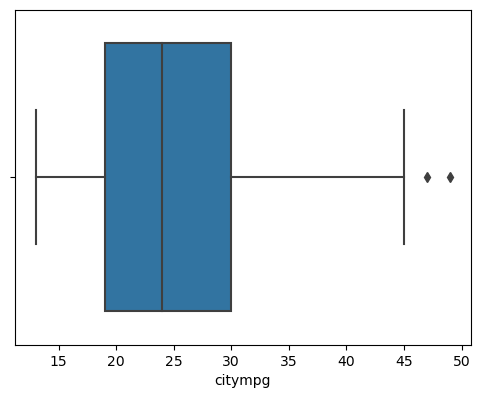

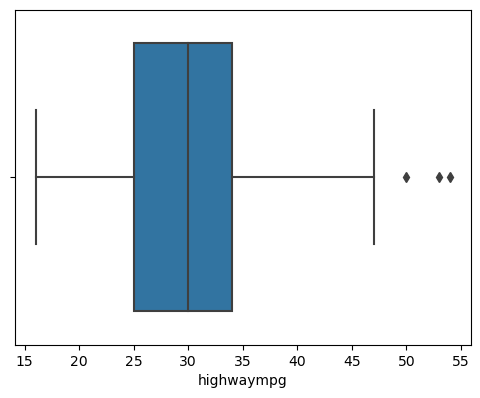

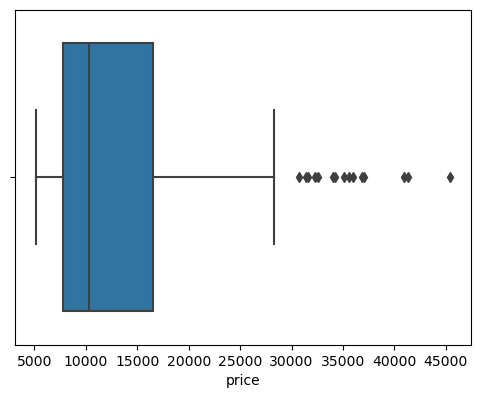

In [20]:
for i in x:
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(x = i, data = data)

In [21]:
x1 =['car_ID', 'symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

In [22]:
for i in x1:
    Q1=data.describe().loc["25%",i]
    Q3=data.describe().loc["75%",i]
    IQR=Q3-Q1
    print(i,data.loc[data[i]<(Q1-IQR*1.5),i].count())
    print(i,data.loc[data[i]>(Q3+IQR*1.5),i].count())
    b = (Q3+IQR*1.5)
    c = (Q1-IQR*1.5)
    data[i].mask((data[i]>b),data[i].median(),inplace =True)
    data[i].mask((data[i]<c),data[i].median(),inplace =True)

car_ID 0
car_ID 0
symboling 0
symboling 0
wheelbase 0
wheelbase 3
carlength 1
carlength 0
carwidth 0
carwidth 8
carheight 0
carheight 0
curbweight 0
curbweight 0
enginesize 0
enginesize 10
boreratio 0
boreratio 0
stroke 15
stroke 5
compressionratio 7
compressionratio 21
horsepower 0
horsepower 6
peakrpm 0
peakrpm 2
citympg 0
citympg 2
highwaympg 0
highwaympg 3
price 0
price 15


C:\Users\samba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samba\AppData\Local\Temp\ipykernel_17548\3607904353.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 12), css, 'bx-', color='green')


Text(0, 0.5, 'CSS')

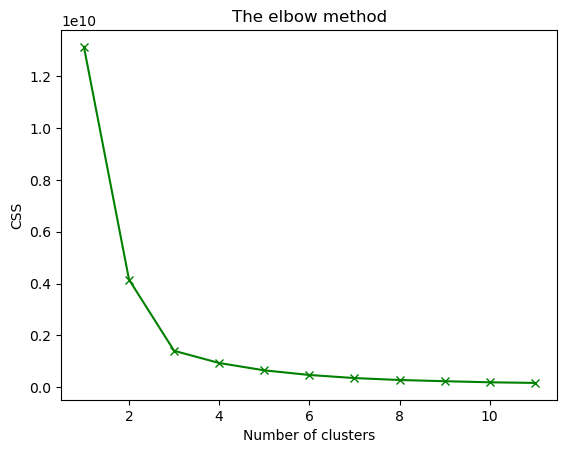

In [23]:
# k-means
from sklearn.cluster import KMeans
css=[]
# Finding inertia on various k values
for i in range(1,12):
    k_mean=KMeans(n_clusters = i).fit(data1.values)
    css.append(k_mean.inertia_)
    
    
plt.plot(range(1, 12), css, 'bx-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')

C:\Users\samba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samba\AppData\Local\Temp\ipykernel_17548\2197599144.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 8), css, 'bx-', color='green')


array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

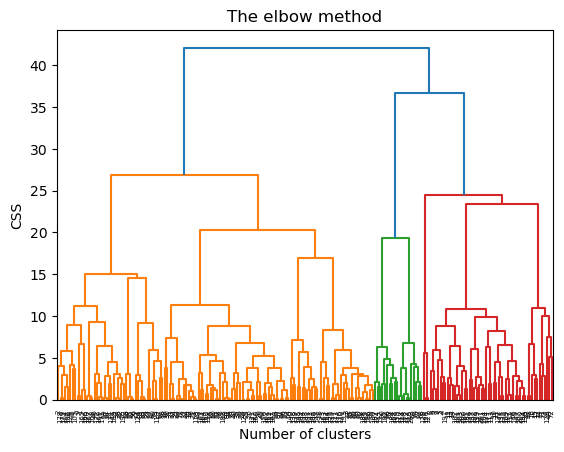

In [24]:
# k-means
from sklearn.cluster import KMeans
css=[]
# Finding inertia on various k values
for i in range(1,8):
    k_mean=KMeans(n_clusters = i).fit(data1.values)
    css.append(k_mean.inertia_)
    
    
plt.plot(range(1, 8), css, 'bx-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')

dendrogram1 = dendrogram(linkage(data_scaled,method = "ward"))
X = data.iloc[:, 3:].values

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
pred = kmeans.fit_predict(X)
pred

In [25]:
data['Target_Kmeans'] = pred

In [26]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Target_Kmeans
0,1,3,alfa-romero giulia,0,0,0,0,0,0,88.6,...,0,3.47,2.68,9.0,111,5000,21,27,13495.0,2
1,2,3,alfa-romero stelvio,0,0,0,0,0,0,88.6,...,0,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,0,0,0,1,0,0,94.5,...,0,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,0,0,1,2,1,0,99.8,...,0,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,audi 100ls,0,0,1,2,2,0,99.4,...,0,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,1,2,0,0,109.1,...,0,3.78,3.15,9.5,114,5400,23,28,16845.0,1
201,202,-1,volvo 144ea,0,1,1,2,0,0,109.1,...,0,3.78,3.15,8.7,160,5300,19,25,19045.0,1
202,203,-1,volvo 244dl,0,0,1,2,0,0,109.1,...,0,3.58,2.87,8.8,134,5500,18,23,21485.0,1
203,204,-1,volvo 246,1,1,1,2,0,0,109.1,...,6,3.01,3.40,9.0,106,4800,26,27,22470.0,1


In [27]:
df0 = data[data.Target_Kmeans==0]

In [28]:
df0[['CarName','price']]

,CarName,price
18,chevrolet impala,5151.0
19,chevrolet monte carlo,6295.0
20,chevrolet vega 2300,6575.0
21,dodge rampage,5572.0
22,dodge challenger se,6377.0
...,...,...
183,volkswagen 1131 deluxe sedan,7975.0
184,volkswagen model 111,7995.0
185,volkswagen type 3,8195.0
186,volkswagen 411 (sw),8495.0


In [29]:
df1 = data[data.Target_Kmeans==1]

In [30]:
df1[['CarName','price']]

,CarName,price
1,alfa-romero stelvio,16500.000
2,alfa-romero Quadrifoglio,16500.000
4,audi 100ls,17450.000
5,audi fox,15250.000
6,audi 100ls,17710.000
7,audi 5000,18920.000
8,audi 4000,23875.000
9,audi 5000s (diesel),17859.167
10,bmw 320i,16430.000
11,bmw 320i,16925.000


In [31]:
df2 = data[data.Target_Kmeans==2]

In [32]:
df2[['CarName','price']]

,CarName,price
0,alfa-romero giulia,13495.0
3,audi 100 ls,13950.0
15,bmw x4,10295.0
16,bmw x5,10295.0
17,bmw x3,10295.0
...,...,...
191,volkswagen rabbit,13295.0
192,volkswagen rabbit custom,13845.0
193,volkswagen dasher,12290.0
194,volvo 145e (sw),12940.0


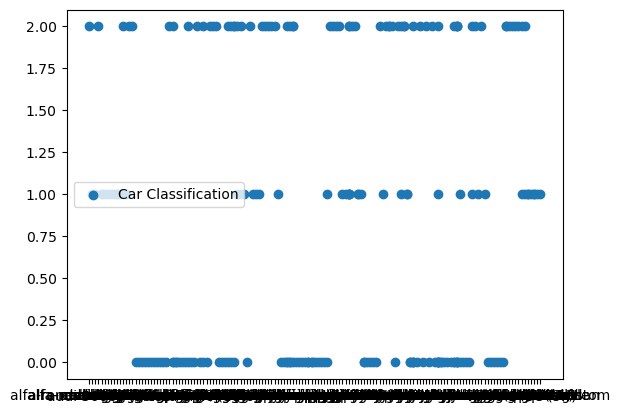

In [33]:
plt.scatter(data['CarName'],data['Target_Kmeans'],label = 'Car Classification')
plt.legend()
plt.show()

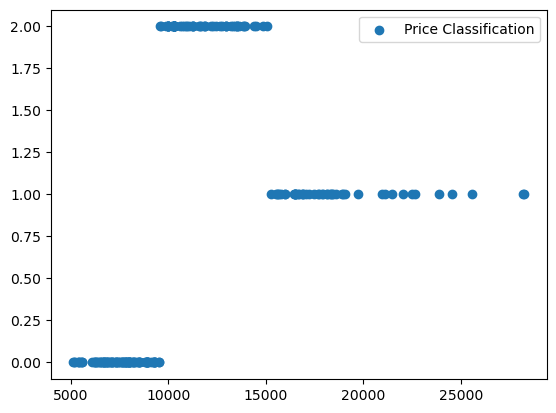

In [34]:
plt.scatter(data['price'],data['Target_Kmeans'],label = 'Price Classification')
plt.legend()
plt.show()

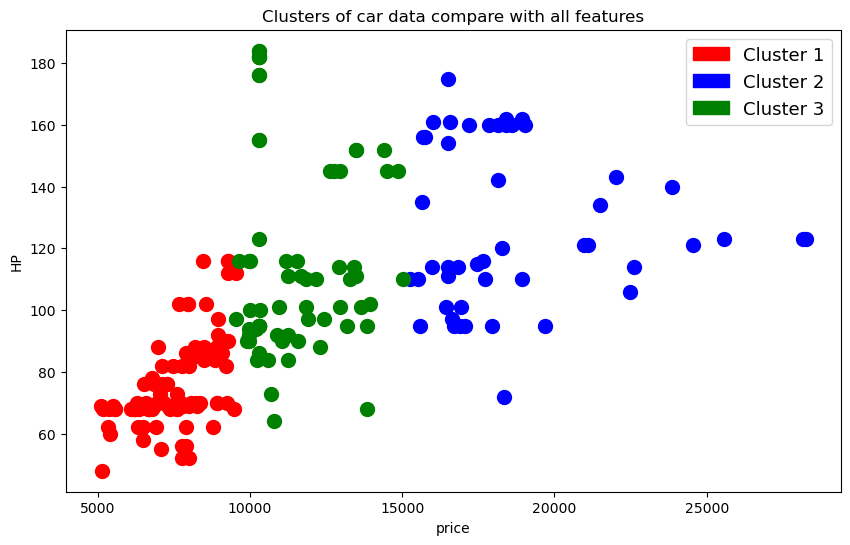

In [35]:
import matplotlib.patches as ptch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of car data compare with all features')
plt.xlabel('price')
plt.ylabel('HP')
plt.scatter(df0['price'],df0['horsepower'],s =100,c = 'red')
plt.scatter(df1['price'],df1['horsepower'],s =100,c = 'blue')
plt.scatter(df2['price'],df2['horsepower'],s =100,c = 'green')

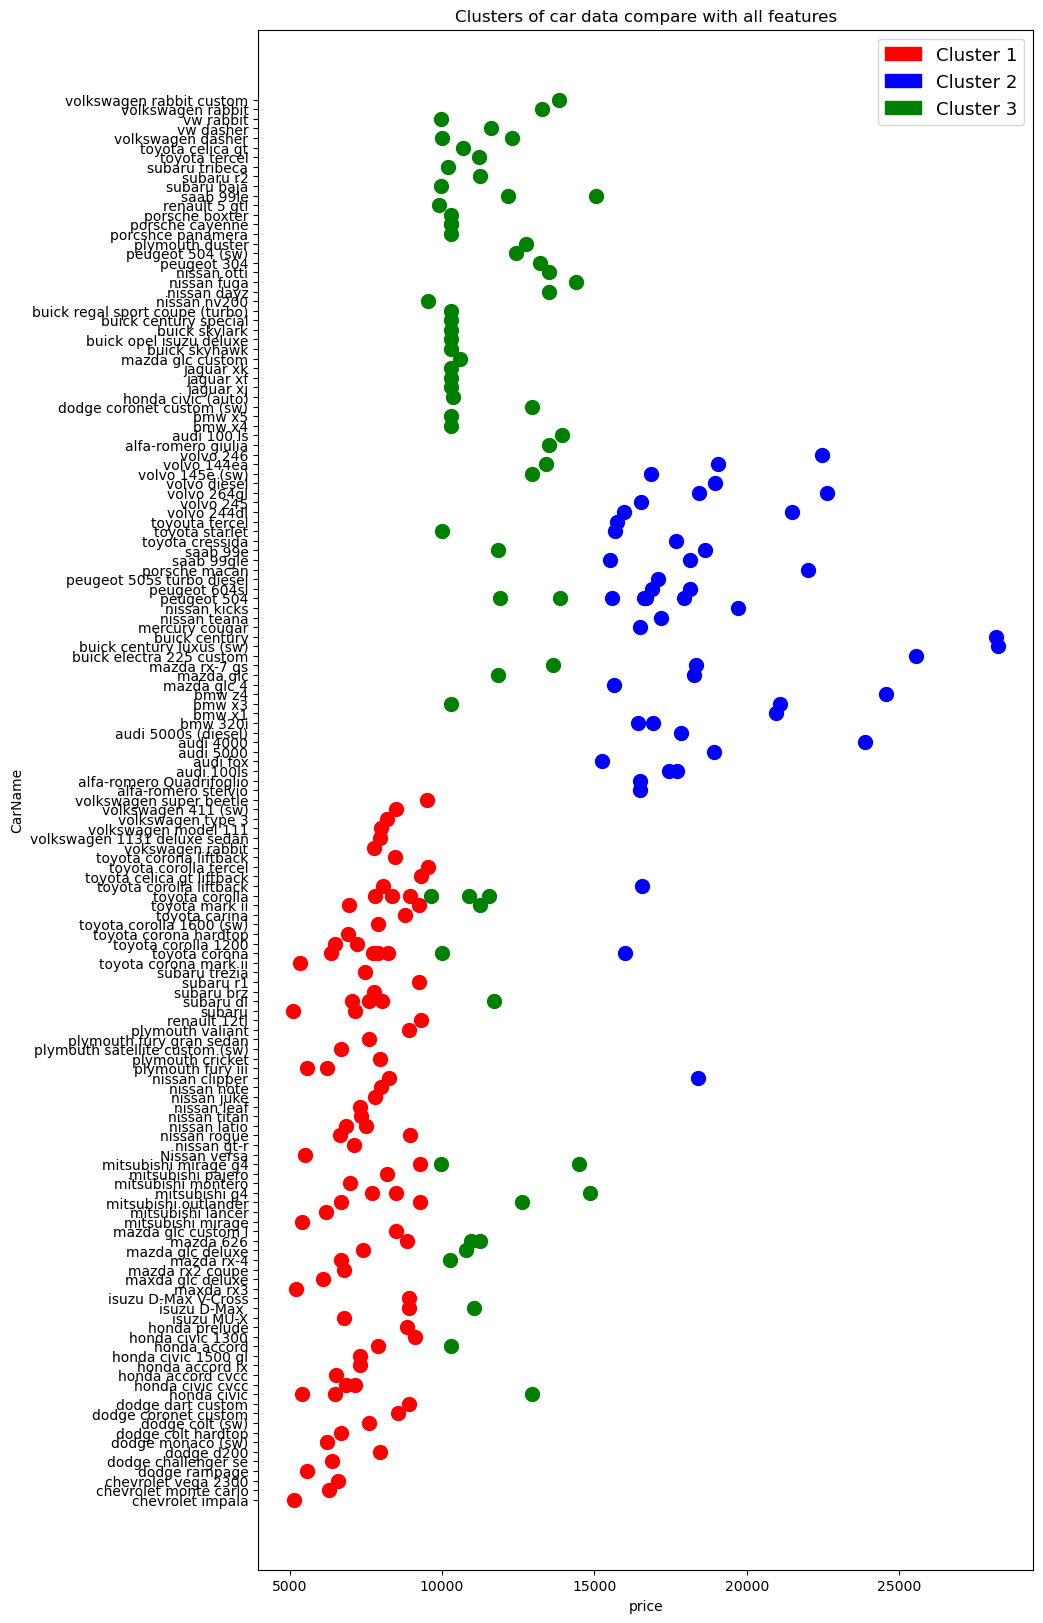

In [45]:
import matplotlib.patches as ptch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of car data compare with all features')
plt.xlabel('price')
plt.ylabel('CarName')
plt.scatter(df0['price'],df0['CarName'],s =100,c = 'red')
plt.scatter(df1['price'],df1['CarName'],s =100,c = 'blue')
plt.scatter(df2['price'],df2['CarName'],s =100,c = 'green')

In [37]:
Hierchical = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
pred = Hierchical.fit_predict(X)

In [38]:
data['Target_Hierarchical'] = pred

In [39]:
df0H = data[data.Target_Hierarchical==0]

In [40]:
df1H = data[data.Target_Hierarchical==1]

In [41]:
df2H = data[data.Target_Hierarchical==2]

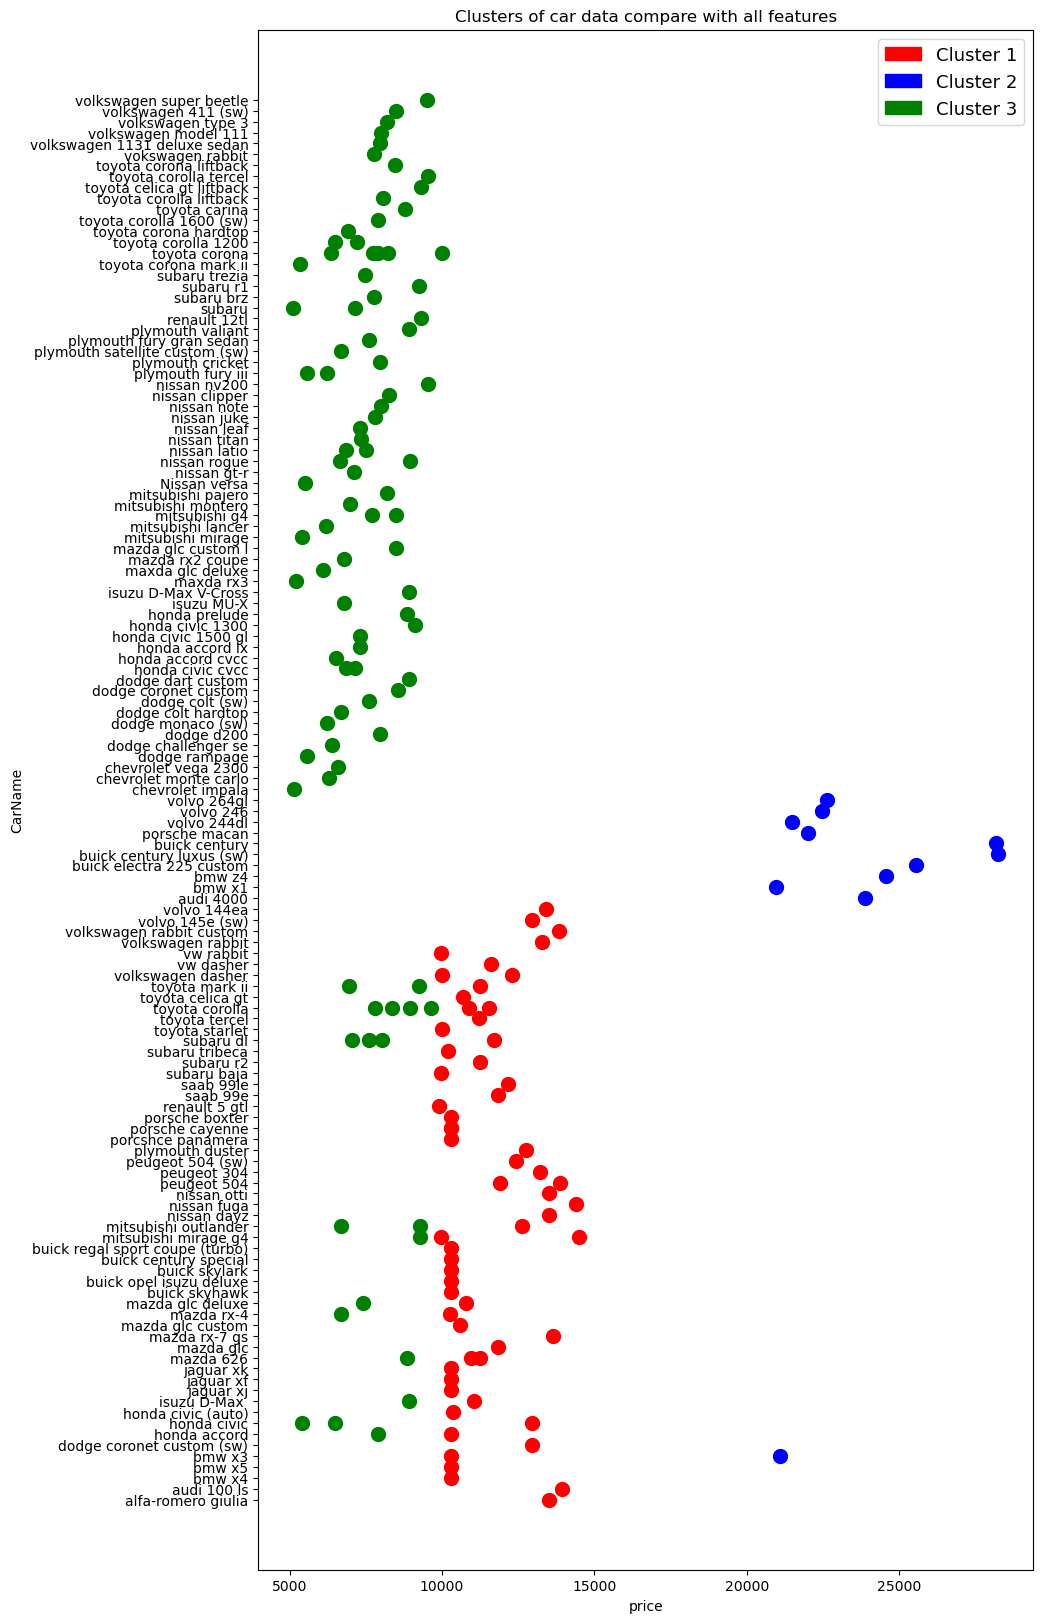

In [46]:
import matplotlib.patches as ptch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of car data compare with all features')
plt.xlabel('price')
plt.ylabel('CarName')
plt.scatter(df0H['price'],df0H['CarName'],s =100,c = 'red')
plt.scatter(df1H['price'],df1H['CarName'],s =100,c = 'blue')
plt.scatter(df2H['price'],df2H['CarName'],s =100,c = 'green')

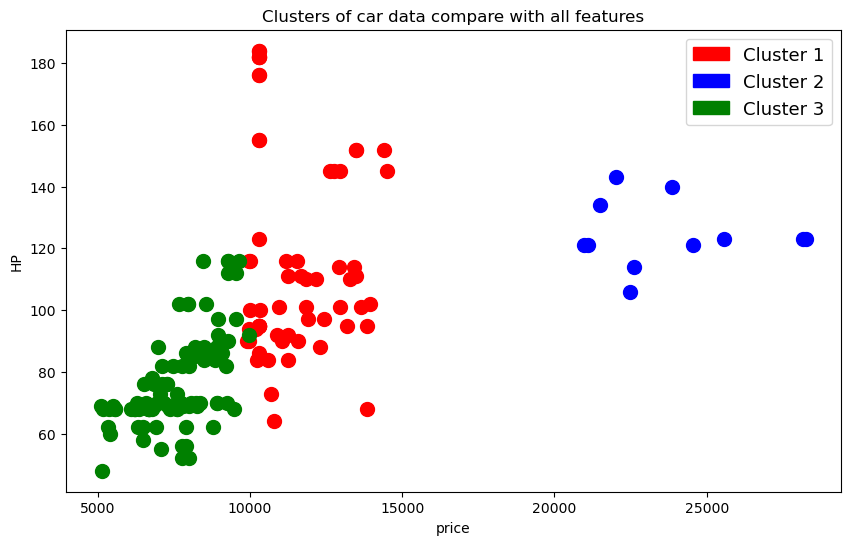

In [43]:
import matplotlib.patches as ptch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of car data compare with all features')
plt.xlabel('price')
plt.ylabel('HP')
plt.scatter(df0H['price'],df0H['horsepower'],s =100,c = 'red')
plt.scatter(df1H['price'],df1H['horsepower'],s =100,c = 'blue')
plt.scatter(df2H['price'],df2H['horsepower'],s =100,c = 'green')

In [44]:
data[['CarName','Target_Kmeans','Target_Hierarchical']]

,CarName,Target_Kmeans,Target_Hierarchical
0,alfa-romero giulia,2,0
1,alfa-romero stelvio,1,3
2,alfa-romero Quadrifoglio,1,3
3,audi 100 ls,2,0
4,audi 100ls,1,3
...,...,...,...
200,volvo 145e (sw),1,3
201,volvo 144ea,1,3
202,volvo 244dl,1,1
203,volvo 246,1,1
